# Approximation by Taylor Polynomials

The `taylor` command can be used to approximate a function $f(x)$ by a polynomial $T_{n}(x)$, as shown below:

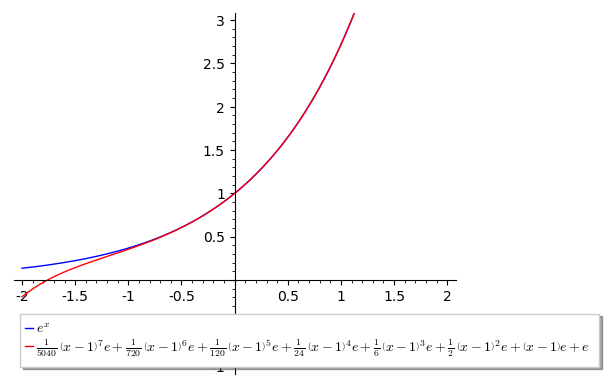

In [9]:
%display latex
f(x) = exp(x)
a = 1; n = 7
Tn(x) = taylor(f(x), x, a, n)    # order n Taylor poly centered at a

p = plot(f(x), (x, -2, 2), ymin = -1, ymax = 3, legend_label = "${0}$".format(latex(f(x))))
p += plot(Tn(x), (x, -2, 2), ymin = -1, ymax = 3, color = 'red', legend_label = "${0}$".format(latex(Tn(x))))
p.show()

As $n$ increases, $T_{n}(x)$ becomes (hopefully) a better approximation of $f(x)$.

Approximation with polynomials makes calculus easier! Goal: develop method to approximate $f(x)$ by a polynomial.

**Example**: The interactive plot below plots $y = e^{x}$ and $y = c_{0} + c_{1}x$. Adjust the values for $c_{0}$ and $c_{1}$ so that $y = c_{0} + c_{1}x$ is a good match for $e^{x}$ near $0$.

In [2]:
@interact
def _(c0 = slider(0, 2, step_size = .1, label = "$c_{0}$"), c1 = slider(0, 2, step_size = .1, label = "$c_{1}$")):
    y1 = exp(x)
    y2 = c0 + c1 * x
    
    p = plot(y1, (x, -2, 2), ymin = -1, ymax = 2, label = "${0}$".format(latex(y1)))
    p += plot(y2, (x, -2, 2), ymin = -1, ymax = 2, color = 'red', label = "${0}$".format(latex(y2)))
    p.show()

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxYTIzOWU4NDg+IHdpdGggMiB3aWRnZXRzCiAgYzA6IFRyYW5zZm9ybUZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3JpcHTigKY=


To make $y = c_{0} + c_{1}x$ a good fit for $f(x) = e^{x}$ near $x = 0$, we should set $c_{0} = 1 = f(0)$ and $c_{1} = 1 = f'(0)$.

**Example**: Repeat the above example, but now try to find values for $c_{0}, c_{1}$ and $c_{2}$ that make $y = c_{0} + c_{1}x + c_{2}x^{2}$ a good fit for the graph of $f(x) = e^{x}$ near $0$.

In [3]:
@interact
def _(c0 = slider(0, 2, step_size = .1, label = "$c_{0}$"), c1 = slider(0, 2, step_size = .1, label = "$c_{1}$"),\
      c2 = slider(-1, 1, step_size = .1, label = "$c_{2}$")):
    y1 = exp(x)
    y2 = c0 + c1 * x + c2 * x^2
    
    p = plot(y1, (x, -.5, .5), ymin = -1, ymax = 2, label = "${0}$".format(latex(y1)))
    p += plot(y2, (x, -.5, .5), ymin = -1, ymax = 2, color = 'red', label = "${0}$".format(latex(y2)))
    p.show()

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxYTMyYjQ1MDA+IHdpdGggMyB3aWRnZXRzCiAgYzA6IFRyYW5zZm9ybUZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3JpcHTigKY=


**Example**: Using the polynomial you found in the previous example, estimate $e^{-.2}$ and $\int_{-.2}^{.2}e^{x}\,dx$.

**Answer**:
$T_{2}(x) = 1 + x + \frac{x^2}{2}$.
1. $e^{.2} \approx{} 1 + (-.2) + \frac{(-.2)^2}{2}$.
2. $\int_{-.2}^{.2}e^{x}\,dx \approx{} ?$.

Now we want to find a methodical approach to constructing these polynomials. In particular, we want to approximate a function $f(x)$ by a quadratic polynomial $c_{0} + c_{1}x + c_{2}x^{2}$. So let's assume these are equal:
$$f(x) = c_{0} + c_{1}x + c_{2}x^{2}.$$
Then
1. $c_{0} ={} f(0)$
1. $c_{1} ={} f'(0)$
1. $c_{2} ={} f''(0) / 2$

In [14]:
var('c0 c1 c2')
f(x) = c0 + c1*x + c2*x^2
diff(f(x), x, 2).subs(x=0)

2*c2

Now we'll make things a little more complicated. Suppose we want to approximate $f(x)$ by a *cubic* polynomial $c_{0} + c_{1}x + c_{2}x^{2} + c_{3}x^{3}$. Once again, we'll assume that
$$f(x) = c_{0} + c_{1}x + c_{2}x^{2} + c_{3}x^{3}.$$
Then
1. $c_{0} ={} f(0)$
1. $c_{1} ={} f'(0)$
1. $c_{2} ={} \frac{f''(0)}{2}$
1. $c_{3} ={} \frac{f'''(0)}{6}$

In [15]:
var('c0 c1 c2 c3')
f(x) = c0 + c1*x + c2*x^2 + c3*x^3
diff(f(x), x, 3)

6*c3

The **Taylor polynomial of order $n$** (centered at $0$) of a function $f(x)$ is given by
$$T_{n}(x) = \sum_{k = 0}^{n}\frac{f^{(k)}(0)}{k!}x^{k}.$$
The Taylor polynomial of order $n$ (centered at $a$) is given by
$$T_{n}(x) = \sum_{k = 0}^{n}\frac{f^{(k)}(a)}{k!}(x - a)^{k}.$$

**Example**: Find the Taylor polynomial of order $3$ for $f(x) = e^x$ centered at $0$.

**Answer**:

**Example**: Find the Taylor polynomial of order $4$ for $f(x) = \cos x$ centered at $a = \pi$.

**Answer**:

**Example**: Find the $10^{\text{th}}, 12^{\text{th}}$ and $15^{\text{th}}$ order Taylor polynomials of $\frac{1}{(1-x)^{2}}$ centered at $0$. Based on this, why should we be able to say that
$$\frac{1}{(1-x)^{2}} = \sum_{k=0}^{\infty}kx^{k-1}?$$

In [6]:
f(x) = 1 / (1 - x)^2

Given a differentiable function $f(x)$, we define the **Taylor series centered at $a$** by
$$\sum_{k=0}^{\infty}\frac{f^{(k)}(a)}{k!}(x - a)^{k}.$$
If $a = 0$, we also call this a **Maclaurin series**.

For most of the functions $f(x)$ we care about, if the Taylor series converges, then *it converges to $f(x)$*.

**Example**: Find the Maclaurin series of $f(x) = e^{x}$ and its radius of convergence.

1. $\displaystyle \sum_{k=0}^{\infty} \frac{?}{?}x^{k}.$
2. $R = {}?$.